In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import scipy

In [49]:
f = 'Roland-SC-88-Overdriven-Guitar-C3.wav'
samplerate, data = wavfile.read(f)
print('Sampling Rate:',samplerate)
print('Audio Shape:',np.shape(data))

Sampling Rate: 44100
Audio Shape: (126729, 2)


C:\Users\pokum\AppData\Local\Temp\ipykernel_23916\997203298.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(f)


In [50]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
print(f"длительность {duration} \n временная шкала {time}")

длительность 2.873673469387755 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.87360544e+00
 2.87362812e+00 2.87365079e+00]


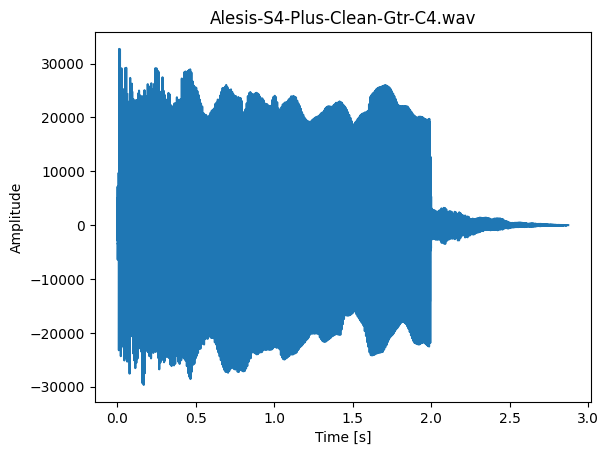

In [51]:
plt.plot(time, data[:, 0])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Alesis-S4-Plus-Clean-Gtr-C4.wav')
plt.show()

In [52]:
sd.play(data[:, 0], samplerate)
sd.wait()

Sampling Rate: 44100
Audio Shape: (126729,)


C:\Users\pokum\AppData\Local\Temp\ipykernel_23916\2324951501.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(t,a,'k-',color='purple')


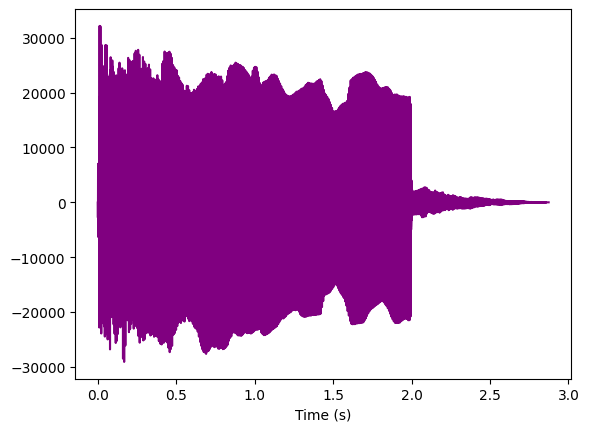

In [53]:
asegment = AudioSegment.from_wav(f)
asegment = asegment.set_channels(1)
asegment.export("mono.wav",format="wav")
s,a = wavfile.read("mono.wav")
print('Sampling Rate:',s)
print('Audio Shape:',np.shape(a))
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
na = data.shape[0]
la = na / s
t = np.linspace(0,la,na)
plt.plot(t,a,'k-',color='purple')
plt.xlabel('Time (s)')
plt.show()

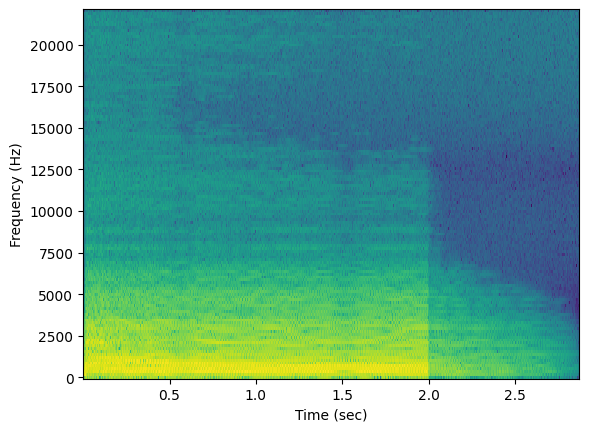

In [54]:
adata = data[:, 0]
s = samplerate
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

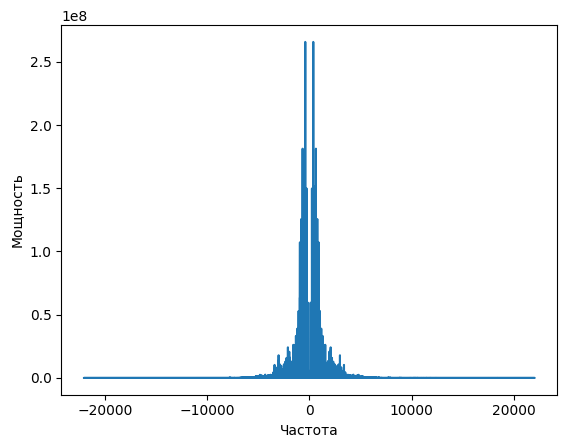

In [55]:
from scipy.fft import fft, fftfreq
# число точек в normalized_tone
N = int(samplerate * duration)
yf = fft(data[:, 0])
xf = fftfreq(N, 1 / samplerate)
plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

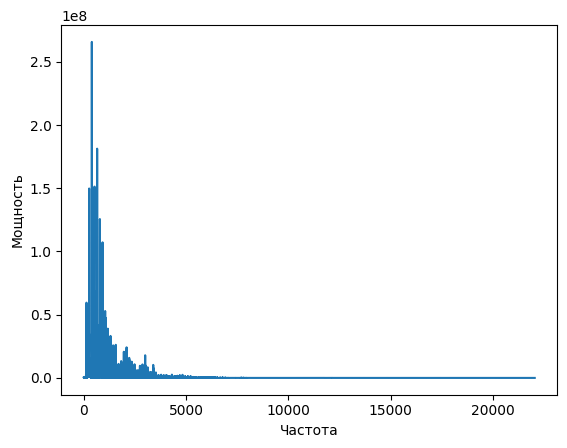

In [56]:
from scipy.fft import rfft, rfftfreq
# число точек в normalized_tone
rN = int(samplerate * duration)
ryf = rfft(data[:, 0])
rxf = rfftfreq(rN, 1 / samplerate)
plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

C:\Users\pokum\AppData\Local\Temp\ipykernel_23916\1853726540.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  target_idx = int(points_per_freq * max)


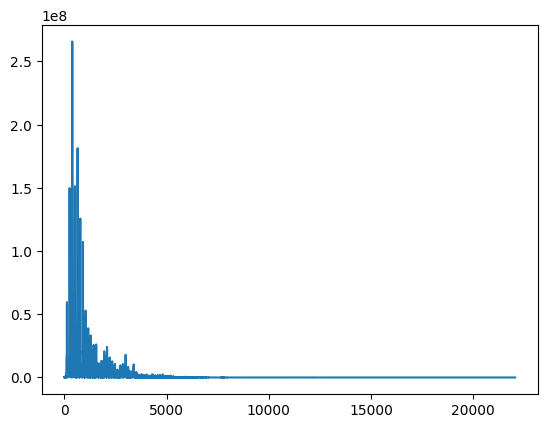

In [57]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(rxf) / (samplerate / 2)
max = np.max(ryf)
target_idx = int(points_per_freq * max)
ryf[target_idx-2:target_idx+2] = 0
plt.plot(rxf, np.abs(ryf))
plt.show()

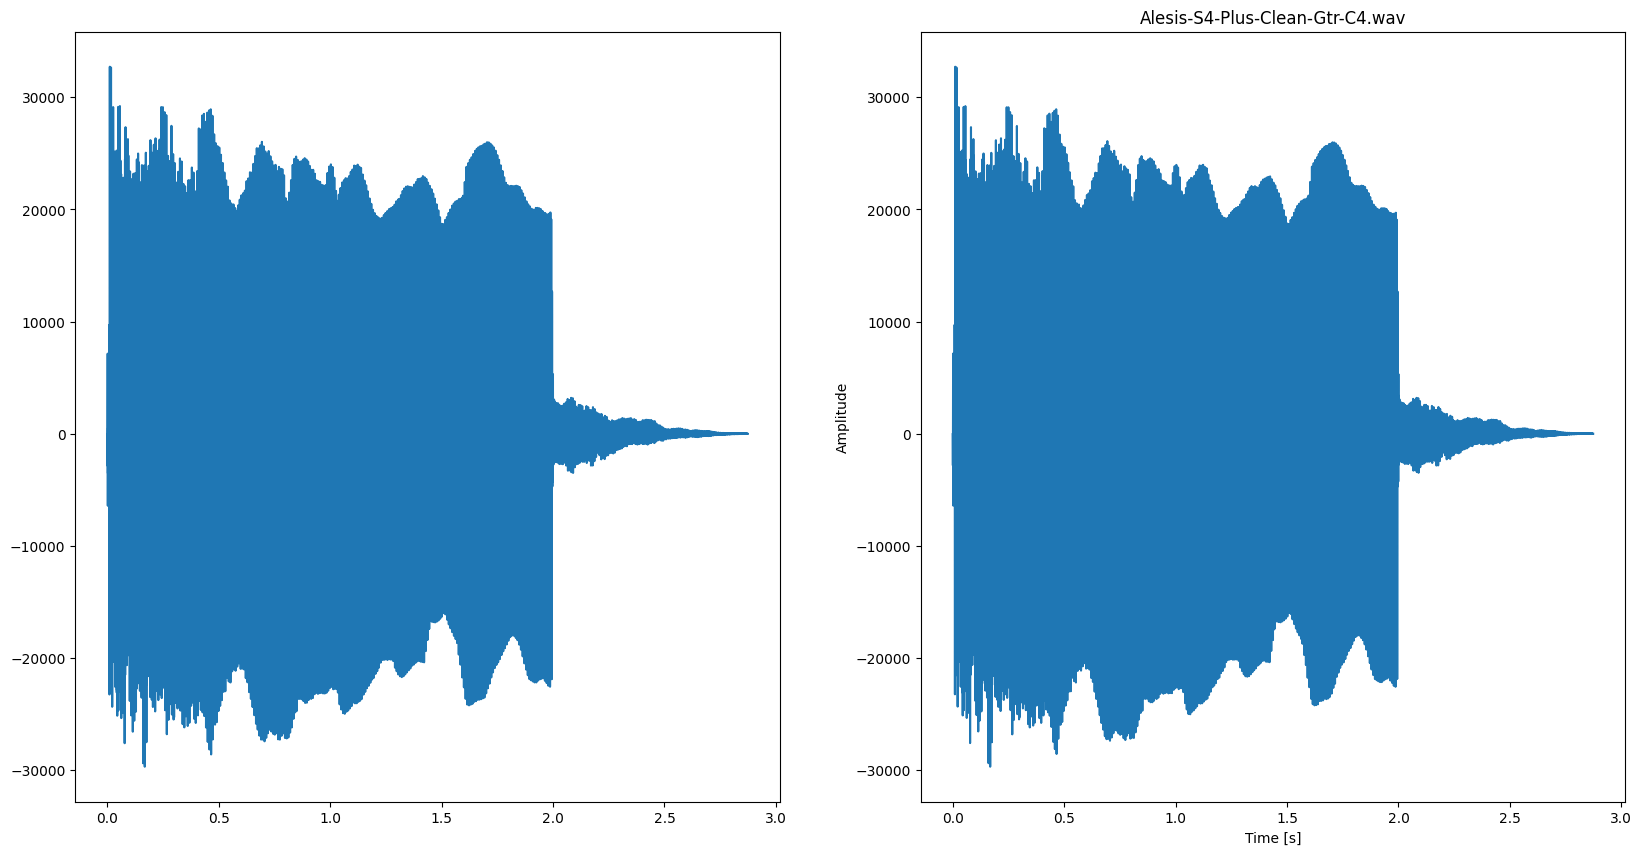

In [58]:
from scipy.fft import irfft
new_sig = irfft(ryf)
fig, ax = plt.subplots(nrows= 1 , ncols= 2, figsize=(20, 10) )
ax[0].plot(time, data[:, 0])
ax[1].plot(time[:len(time) - 1], new_sig)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Alesis-S4-Plus-Clean-Gtr-C4.wav')
plt.show()

In [59]:
def freq_to_mel(freq):
    return 1125.0 * np.log(1.0 + freq / 700.0)

def met_to_freq(mels):
    return 700.0 * (np.exp(mels / 1125.0) - 1.0)

In [60]:
def get_filter_points(fmin, fmax, mel_filter_count, data_size, sample_rate=44100):
    
    mels = np.linspace(freq_to_mel(fmin), freq_to_mel(fmax), num=mel_filter_count+2)
    freqs = met_to_freq(mels)
    
    return np.floor((data_size + 1) / sample_rate * freqs).astype(int), freqs

In [61]:
def hm(f,k, m):
    if k < f[m-1]:
        return 0
    elif f[m-1] <= k <f[m]:
        return (k-f[m-1])/(f[m]-f[m-1])
    elif f[m] <= k <= f[m+1]:
        return (k-f[m])/(f[m+1]-f[m])
    return 0

In [62]:
min_freq = 0
max_freq = samplerate / 2
mel_filter_count = 20

points,freqs = get_filter_points(min_freq, max_freq, mel_filter_count, len(data), samplerate)

In [63]:
ft_data = scipy.fft.fft(adata)

In [64]:
s = []
for m in range(1, mel_filter_count+1):
    summ = 0
    for k in range(len(ft_data)-1):
        summ+=np.abs(ft_data[k])**2*hm(points, k, m)
    s.append(np.log(summ))

In [65]:
cn = []
print()
for n in range(mel_filter_count):
    summ = 0
    for m in range(mel_filter_count):
        summ+=s[m]*np.cos(np.pi*n*(m+1/2)/mel_filter_count)
    cn.append(summ)

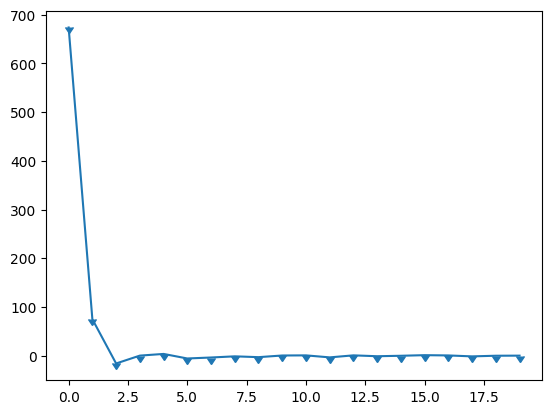

In [66]:
plt.plot(cn,marker=matplotlib.markers.CARETDOWNBASE)

[36.42166293204411, 37.391645814468966, 38.55008949343731, 40.028618862768965, 39.5496701740565, 39.597071241156975, 39.39203913712918, 38.821607723593665, 38.04616597984979, 37.306313913452115, 36.29008252234679, 37.35982948677508, 36.9692310802946, 35.96552954941127, 36.30641079988125, 35.23784079946862, 33.58358683122594, 33.524246168490116, 32.68046655518229, 30.984374987378015, 29.635319377394453, 27.51669670035764, 26.700228370649786, 26.182025171121328, 26.485747450452173, 26.092108819745185, 25.04629274738009, 24.39224021632206, 24.49047209976814, 25.194113084874246]


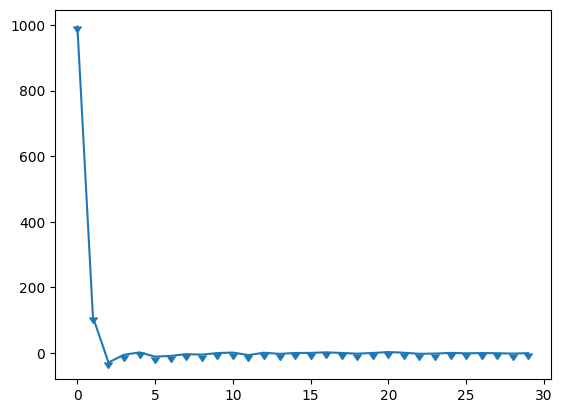

In [67]:
def B_inv(b):
    return 700 * (np.exp(b / 1125) - 1)

def B(b):
    return 1125 * np.log(1 + b / 700)

def get_filter_points(fmin, fmax, mel_filter_num, wav_size, sample_rate=44100):    
    mels = np.linspace(B(fmin), B(fmax), num=mel_filter_num + 2)
    freqs = B_inv(mels)
    
    return np.floor((wav_size + 1) / sample_rate * freqs).astype(int)

def H(k, m, f):
    if k >= f[m - 1] and k < f[m]:
        return (k - f[m - 1]) / (f[m] - f[m - 1])
    if k >= f[m] and k <= f[m + 1]:
        return (f[m + 1] - k) / (f[m + 1] - f[m])
    return 0

x = data[:, 0]
X = scipy.fft.fft(adata)
M = 30
N = len(X)

filters_points = get_filter_points(0, samplerate / 2, M, N)

S = []

for m in range(1, M + 1):
    Si = 0
    for k in range(N - 1):
        Si += (np.abs(X[k]) ** 2) * H(k, m, filters_points)
    S += [np.log(Si)]
print(S)
c = []

for n in range(M):
    ci = 0
    for m in range(M):
        ci += S[m] * np.cos(np.pi * n * (m + 0.5) / M)
    c += [ci]

plt.plot(c,marker=matplotlib.markers.CARETDOWNBASE)